<a href="https://colab.research.google.com/github/Park-New-project/TIL/blob/main/%5BAI%5D_221021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install tensorflow==2.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras==2.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 다중 선형 회귀

In [ ]:
import numpy as np

x1 = np.array([2,4,6,8])
x2 = np.array([0,4,2,3])
y = np.array([81,93,91,97])

In [ ]:
x=[[x1[i],x2[i]] for i in range(len(x1))]
x

[[2, 0], [4, 4], [6, 2], [8, 3]]

In [ ]:
a1=0
a2=0
b=0

# 학습률
lr = 0.02

#반복 횟수
epochs = 2001

# 경사하강법
for i in range(epochs):
    # y = a1x1+a2x2+b
    y_pred = a1*x1 + a2*x2 +b

    # 오차 : 실제값 - 예측값
    error = y - y_pred

    # 오차 함수를 a1로 편미분
    a1_diff = -(2/len(x1)) * sum(x1 * error)

    # 오차 함수를 a2로 편미분
    a2_diff = -(2/len(x2)) * sum(x2 * error)
    
    # 오차 함수를 b로 편미분
    b_diff = -(2/len(x1)) * sum(error)

    # 새로운 a1, a2, b 적용
    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    b = b - lr * b_diff

    if i % 100 ==0:
        print("epochs = %.f, 기울기1 = %.04f, 기울기2 = %.04f, 절편 = %.04f"%(i,a1,a2,b))

epochs = 0, 기울기1 = 18.5600, 기울기2 = 8.4500, 절편 = 3.6200
epochs = 100, 기울기1 = 7.2994, 기울기2 = 4.2867, 절편 = 38.0427
epochs = 200, 기울기1 = 4.5683, 기울기2 = 3.3451, 절편 = 56.7901
epochs = 300, 기울기1 = 3.1235, 기울기2 = 2.8463, 절편 = 66.7100
epochs = 400, 기울기1 = 2.3591, 기울기2 = 2.5823, 절편 = 71.9589
epochs = 500, 기울기1 = 1.9546, 기울기2 = 2.4427, 절편 = 74.7362
epochs = 600, 기울기1 = 1.7405, 기울기2 = 2.3688, 절편 = 76.2058
epochs = 700, 기울기1 = 1.6273, 기울기2 = 2.3297, 절편 = 76.9833
epochs = 800, 기울기1 = 1.5673, 기울기2 = 2.3090, 절편 = 77.3948
epochs = 900, 기울기1 = 1.5356, 기울기2 = 2.2980, 절편 = 77.6125
epochs = 1000, 기울기1 = 1.5189, 기울기2 = 2.2922, 절편 = 77.7277
epochs = 1100, 기울기1 = 1.5100, 기울기2 = 2.2892, 절편 = 77.7886
epochs = 1200, 기울기1 = 1.5053, 기울기2 = 2.2875, 절편 = 77.8209
epochs = 1300, 기울기1 = 1.5028, 기울기2 = 2.2867, 절편 = 77.8380
epochs = 1400, 기울기1 = 1.5015, 기울기2 = 2.2862, 절편 = 77.8470
epochs = 1500, 기울기1 = 1.5008, 기울기2 = 2.2860, 절편 = 77.8518
epochs = 1600, 기울기1 = 1.5004, 기울기2 = 2.2859, 절편 = 77.8543
epochs = 1700, 기울기1 = 1.50

# 다중 선형 회귀 평면 3D 시각화


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as statm
import statsmodels.formula.api as statfa
import pandas as pd

X = statm.add_constant(x)
print(X)
results = statm.OLS(y,X).fit()
print(results)

[[1. 2. 0.]
 [1. 4. 4.]
 [1. 6. 2.]
 [1. 8. 3.]]


In [ ]:
hour_class = pd.DataFrame(x, columns=['study_hours','private_class'])
print(hour_class)
hour_class['score'] = pd.Series(y)
print(hour_class)

   study_hours  private_class
0            2              0
1            4              4
2            6              2
3            8              3
   study_hours  private_class  score
0            2              0     81
1            4              4     93
2            6              2     91
3            8              3     97


In [ ]:
model = statfa.ols(formula="score ~ study_hours + private_class", data=hour_class)
print(model)

result_formula = model.fit()
print(result_formula)

In [ ]:
a,b = np.meshgrid(np.linspace(hour_class.study_hours.min(), hour_class.study_hours.max(), 100),
                  np.linspace(hour_class.private_class.min(), hour_class.private_class.max(), 100))
print(a)
print(b)

[[2.         2.06060606 2.12121212 ... 7.87878788 7.93939394 8.        ]
 [2.         2.06060606 2.12121212 ... 7.87878788 7.93939394 8.        ]
 [2.         2.06060606 2.12121212 ... 7.87878788 7.93939394 8.        ]
 ...
 [2.         2.06060606 2.12121212 ... 7.87878788 7.93939394 8.        ]
 [2.         2.06060606 2.12121212 ... 7.87878788 7.93939394 8.        ]
 [2.         2.06060606 2.12121212 ... 7.87878788 7.93939394 8.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.04040404 0.04040404 0.04040404 ... 0.04040404 0.04040404 0.04040404]
 [0.08080808 0.08080808 0.08080808 ... 0.08080808 0.08080808 0.08080808]
 ...
 [3.91919192 3.91919192 3.91919192 ... 3.91919192 3.91919192 3.91919192]
 [3.95959596 3.95959596 3.95959596 ... 3.95959596 3.95959596 3.95959596]
 [4.         4.         4.         ... 4.         4.         4.        ]]


In [ ]:
X_ax = pd.DataFrame({'study_hours':a.ravel(), 'private_class':b.ravel()})
X_ax

,study_hours,private_class
0,2.000000,0.0
1,2.060606,0.0
2,2.121212,0.0
3,2.181818,0.0
4,2.242424,0.0
...,...,...
9995,7.757576,4.0
9996,7.818182,4.0
9997,7.878788,4.0
9998,7.939394,4.0


In [ ]:
fittedY = result_formula.predict(exog=X_ax)
fittedY

0       80.857143
1       80.948052
2       81.038961
3       81.129870
4       81.220779
          ...    
9995    98.636364
9996    98.727273
9997    98.818182
9998    98.909091
9999    99.000000
Length: 10000, dtype: float64

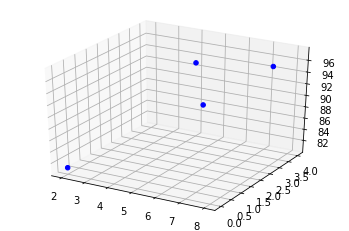

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(hour_class['study_hours'],hour_class['private_class'],
           hour_class['score'], c='b', marker='o', alpha=1)
plt.show()

In [ ]:
fittedY.values

array([80.85714286, 80.94805195, 81.03896104, ..., 98.81818182,
       98.90909091, 99.        ])

In [ ]:
fittedY.values.reshape(a.shape)

array([[80.85714286, 80.94805195, 81.03896104, ..., 89.67532468,
        89.76623377, 89.85714286],
       [80.94949495, 81.04040404, 81.13131313, ..., 89.76767677,
        89.85858586, 89.94949495],
       [81.04184704, 81.13275613, 81.22366522, ..., 89.86002886,
        89.95093795, 90.04184704],
       ...,
       [89.81529582, 89.90620491, 89.997114  , ..., 98.63347763,
        98.72438672, 98.81529582],
       [89.90764791, 89.998557  , 90.08946609, ..., 98.72582973,
        98.81673882, 98.90764791],
       [90.        , 90.09090909, 90.18181818, ..., 98.81818182,
        98.90909091, 99.        ]])

In [ ]:
a.shape

(100, 100)

In [ ]:
fittedY.values.reshape(a.shape).shape

(100, 100)

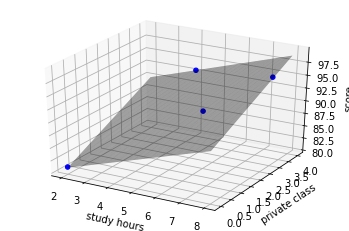

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(hour_class['study_hours'],hour_class['private_class'],
           hour_class['score'], c='b', marker='o', alpha=1)
ax.plot_surface(a,b,fittedY.values.reshape(a.shape),
                rstride=1,cstride=1, color="none", alpha=0.4)
ax.set_xlabel('study hours')
ax.set_ylabel('private class')
ax.set_zlabel('score')

plt.show()

# 텐서플로에서 실행하는 단순선형회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

# 딥러닝 모델 생성
model = Sequential()

# 노드 생성
model.add(Dense(1,input_dim = 1, activation="linear"))

# 오차함수 : 평균 제곱오차(MSE)
# 최적화 함수 : 확률적 경사하강법(SGD)
model.compile(loss="mse", optimizer="sgd")

# 딥러닝 모델의 기계학습
model.fit(x,y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 561ms/step - loss: 8564.3350
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 2088.9150
Epoch 3/2000
1/1 [==============================] - 0s 12ms/step - loss: 1132.5024
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 986.7286
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 960.0519
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 950.9017
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 944.3596
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 938.2341
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 932.2033
Epoch 10/2000
1/1 [==============================] - 0s 14ms/step - loss: 926.2196
Epoch 11/2000
1/1 [==============================] - 0s 10ms/step - loss: 920.2758
Epoch 12/2000
1/1 [==============================] - 0s 11ms/step - loss: 914.3708
Epoch 13/20

- GD : (경사 하강법)
- SGD : (획률적 경사 하강법) 데이터가 많을 때 사용 (속도가 비교적 빠름)